 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]


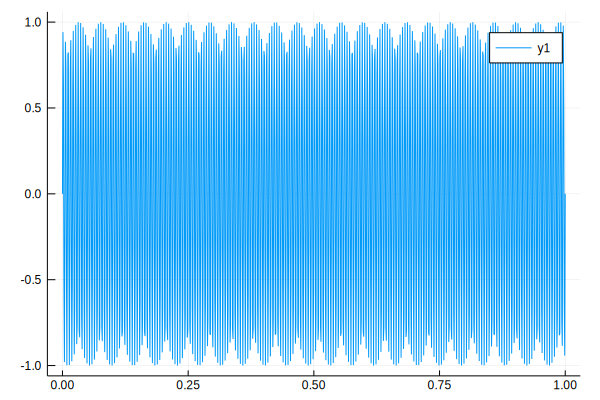

In [71]:
Pkg.add("FFTW")
Freq = 1024
Pts = 0:1/(Freq-1):1
using(Plots)
Values= sin.(2*pi*Pts*200)
plot(Pts, Values)

In [72]:
using FFTW
y=fft(Values)

1024-element Array{Complex{Float64},1}:
  5.218048215738236e-14 + 0.0im                  
  1.3347887720671636e-5 - 0.0043507213858283295im
   5.339558898209695e-5 - 0.008702018832949424im 
 0.00012015521804265017 - 0.013054468689263438im 
 0.00021364697629788765 - 0.01740864787475374im  
  0.0003338991669802338 - 0.021765134171590844im 
  0.0004809482163419254 - 0.026124506508033274im 
  0.0006548387016591661 - 0.03048734525091712im  
  0.0008556233822289983 - 0.034854232495481696im 
  0.0010833632430690132 - 0.03922575235784542im  
  0.0013381275373085533 - 0.04360249127059146im  
  0.0016199938400546232 - 0.04798503827830425im  
  0.0019290481075099342 - 0.05237398534063109im  
                        ⋮                        
  0.0019290481075107113 + 0.05237398534063198im  
   0.001619993840058065 + 0.047985038278303804im 
  0.0013381275373096635 + 0.04360249127059346im  
  0.0010833632430706785 + 0.039225752357840094im 
  0.0008556233822289983 + 0.03485423249547637im  
  0.000654

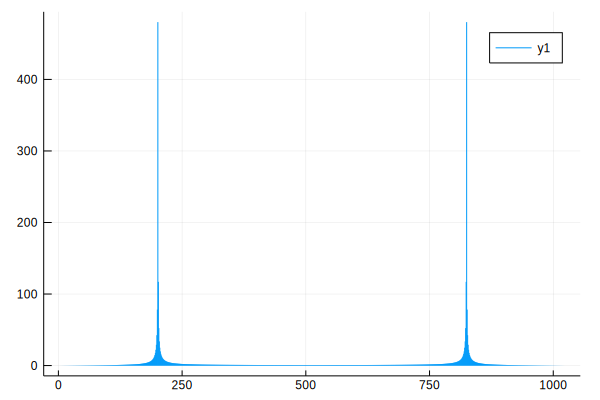

In [73]:
sticks(abs.(y))

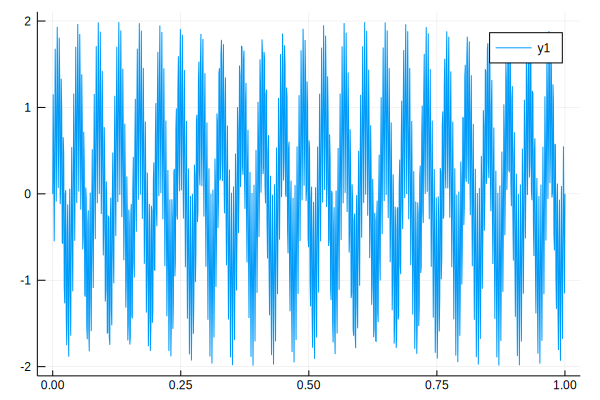

In [74]:
SignalsSum = (sin.(2*pi*Pts*25) + sin.(2*pi*Pts*250))
plot(Pts, SignalsSum)

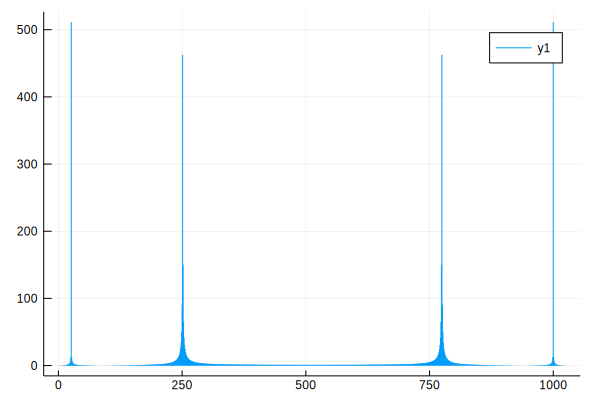

In [75]:
SumFFT=fft(SignalsSum)
sticks(abs.(SumFFT))

In [76]:
SignalNoised = (sin.(2*pi*Pts*25) + sin.(2*pi*Pts*250)) + rand(Float64, 1024)

1024-element Array{Float64,1}:
  0.44110192110193425  
  1.872506545474648    
  0.9442998967822868   
 -0.10543003578949017  
  1.2733679781807226   
  1.7002540300739715   
  1.3822437902218079   
  0.655042583423413    
  1.6356209225618052   
  2.697354129215149    
  1.5318027185078678   
  0.6855426185865708   
  0.6066136131905129   
  ⋮                    
  0.42562843389776317  
 -0.8893891017819413   
 -1.1699614403672063   
  0.1784100098371314   
  0.18885003601473305  
 -0.685706939774273    
 -0.9636356768776768   
 -0.0021497146608548956
  1.2419420428485046   
  0.2652185102966114   
 -1.1058161044724006   
  0.6251666732018689   

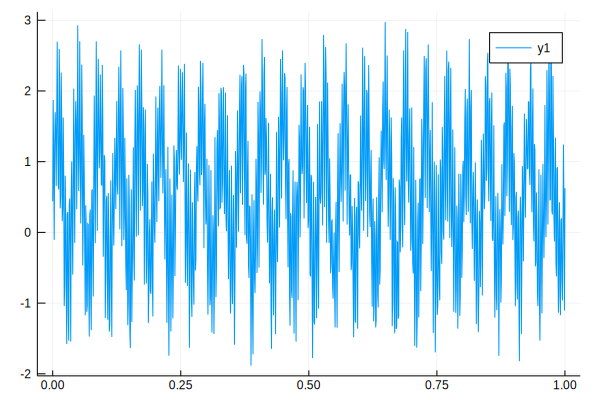

In [77]:
plot(Pts, SignalNoised)

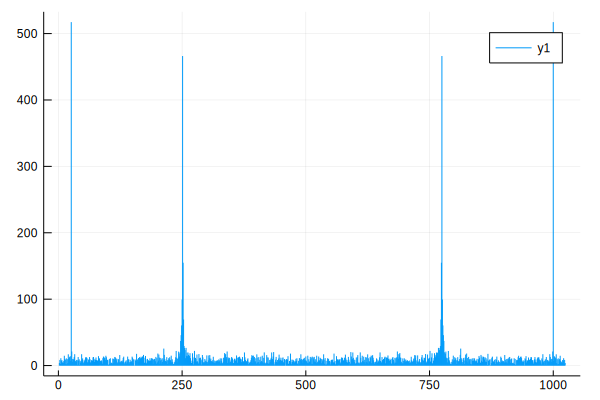

In [78]:
NoiseFFT=fft(SignalNoised)
NoiseFFT[1]=0
sticks(abs.(NoiseFFT))

In [79]:
function cutNoise(x)
    if x<50.0
        0
    else
        x
    end
end

cutNoise (generic function with 1 method)

In [80]:
ReducedNoise=map(cutNoise, abs.(NoiseFFT))

1024-element Array{Real,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

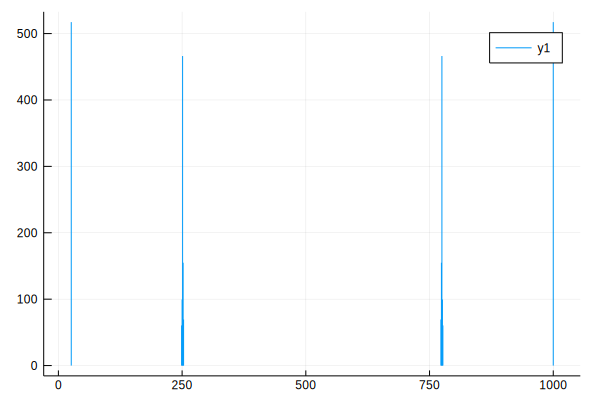

In [81]:
sticks(ReducedNoise)

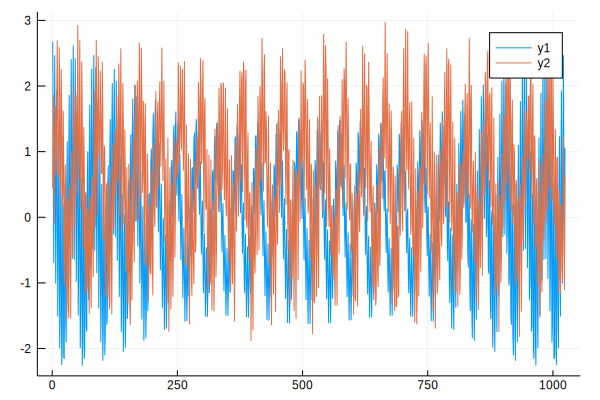

In [82]:
InvertedReducedNoise = ifft(ReducedNoise)
plot(real(InvertedReducedNoise))
plot!(SignalNoised)

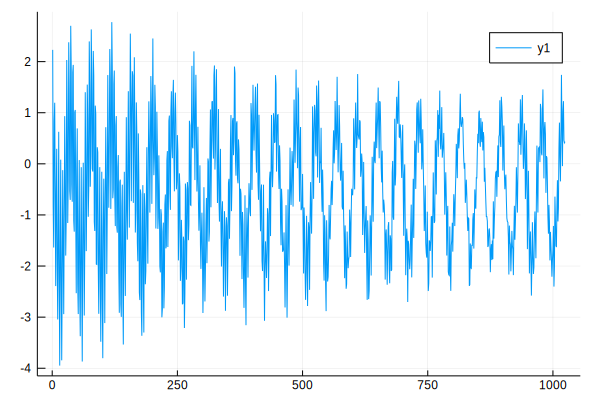

In [83]:
plot(real(InvertedReducedNoise)-SignalNoised)

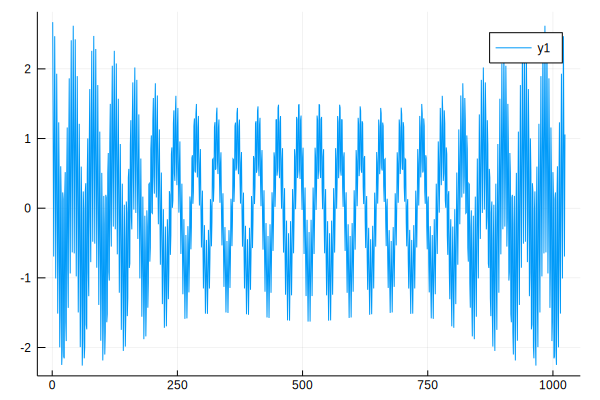

In [84]:
plot(real(InvertedReducedNoise))

In [85]:
function shiftArray(arr, dist)
    resultArray = zeros(size(arr, 1))
    for i in 1:1:size(arr, 1)-dist
        resultArray[i+dist]=arr[i]
    end
    resultArray
end
        

shiftArray (generic function with 1 method)

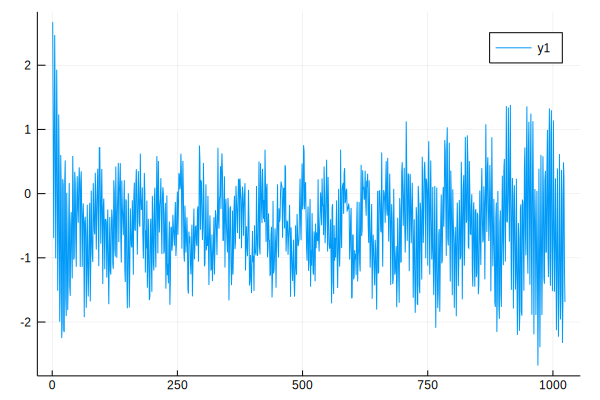

In [164]:
i=i+1
plot(real(InvertedReducedNoise)-shiftArray(SignalNoised, i))

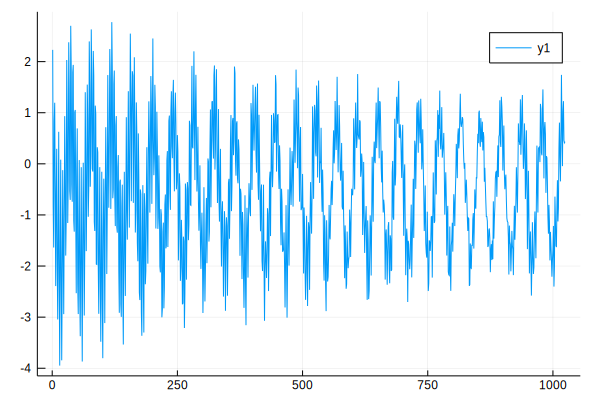

In [88]:
plot(real(InvertedReducedNoise)-SignalNoised)